## Nonparamatric Methods </font>


### <font color='blue' size=5px> The Nadaraya-Watson Regressor </font>

<font color='red'>**Main Idea**: Estimate a conditional mean (expected value) given the input variables.</font>

$$\large{
\mathbb{E}[Y| X=x]=\sum\limits_{i=1}^nW_{i}(x)y_i}
$$

If we have estimates for the joint probability density $f$ and the marginal density $f_X$ we consider:

$$\large{
m(x)=\mathbb{E}[y| X=x]=\int y f_{Y| X=x}(y)\,\mathrm{d}y=\frac{\int yf(x,y)\,\mathrm{d}y}{f_X(x)}\tag{1}
}
$$

where $X$ is the input data (features) and $Y$ is the dependent variable.

We approximate the joint probability density function by using a kernel:

$$\large{
\begin{align}
\hat{f}(x,y;\mathbf{h})=\frac{1}{n}\sum_{i=1}^n K_{h_1}(x-x_{i})K_{h_2}(y-y_{i}).
\end{align}}
$$

The marginal density is also approximated in a similar way:

$$\large{
\hat{f}_X(x;h_1)=\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-x_{i})}.
$$

By substituting these approximations into equation (1) we obtain:

$${
\begin{align*}
\frac{\int y \hat{f}(x,y;\mathbf{h})\,\mathrm{d}y}{\hat{f}_X(x;h_1)}=&\,\frac{\int y \frac{1}{n}\sum_{i=1}^nK_{h_1}(x-X_i)K_{h_2}(y-y_i)\,\mathrm{d}y}{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-x_i)}\\
=&\,\frac{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-x_i)\int y K_{h_2}(y-y_i)\,\mathrm{d}y}{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-x_i)}\\
=&\,\frac{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-x_i)y_i}{\frac{1}{n}\sum_{i=1}^nK_{h_1}(x-x_i)}\\
=&\,\sum_{i=1}^n\frac{K_{h_1}(x-x_i)}{\sum_{i=1}^nK_{h_1}(x-x_i)}y_i.
\end{align*}}
$$

Thus the conditional mean $\mathbb{E}[Y| X=x]$ can be seen as a weighted average of $y_i$:

$$\large{
\mathbb{E}[Y| X=x]=\sum\limits_{i=1}^nW_{i}(x)y_i}
$$

where

$$\large{
\begin{align*}
W_{i}(x):=\frac{K_h(x-x_i)}{\sum_{i=1}^nK_h(x-x_i)}.
\end{align*}}
$$

<font color='green'> This is to say that the Nadaraya-Watson estimator is a local mean of $Y$ around $X=x_i.$ </font>


### <font color='blue' size=6pt> Functional Data Analysis - GAMs </font>

The main idea of generalized additive models (GAMs) is based on the assumption that


$$\large \mathbb{E}\left[Y|X=x_i\right]=\beta_0+f_1(x_{i1})+f_2(x_{i2})+...+f_p(x_{ip})$$

By comparison, a linear model is

$$\large \mathbb{E}\left[Y|X=x_i\right]=\beta_0+\beta_1\cdot x_{i1}+\beta_2\cdot x_{i2}+...+\beta_p\cdot x_{ip}$$

We consider a regularized maximum likelihood approach for the generalized additive model

$$\large
y_i = c +\sum\limits_{j=1}^{p}f_j(x_i^{(j)}) + \epsilon_i
$$

and for standardization we assume

$$\large
\sum\limits_{i=1}^{n}f_j(x_i^{(j)})=0
$$

For classificaiton problems we can use:

$$\large
g\left(\mathbb{P}\left[Y=c|X=x_i\right]\right) = c +\sum\limits_{j=1}^{p}f_j(x_i^{(j)})
$$

where $g$ is a link function, e.g. the inverse of the logistic sigmoid.

To prevent overfitting, we consider a sparsity-smoothness regularization:

$$\large
J(f_i) = \lambda_1\sqrt{\|f_j\|^2_n+\lambda_2I^2(f_j)}
$$

where the following term is designed to control the rapid accelerations/decelerations.

$$\large
I^2(f_j)=\int(f''_j(x))^2dx \,\,\, \text{and}\,\,\,\|f\|^2_n=\frac{1}{n}\sum\limits_{i=1}^{n}f_i^2.
$$

The objective function is

$$\large
\left \|y-\sum\limits_{j=1}^{p}f_j\right\|_n^2 + \sum\limits_{j=1}^{p}J(f_j).
$$

and this is to minimize over a suitable class of functions $\mathcal{F}.$





### Cubic Splines

**What we need:**

- we need the tools, the building blocks for constructing any *nonlinearity* we want.
- we need a good validation mechanism.
- we need an efficient implementation of such tools in programming languages, e.g. Python.

The main idea is to use third degree polynomial functions, such as

$$
s_i(x)=a_i(x-x_i)^3+b_i(x-x_i)^2+c_i(x-x_i)+d_i
$$

for $i=1,2,...,n-1$ and $x_i$ are data points of the same feature. It is quite obvious that we have:


$$
s'_i(x) = 3a_i(x-x_i)^2+2b_i(x-x_i)+c_i
$$

and
$$
s''_i(x)=6a_i(x-x_i)+2b_i
$$


So we create

$$
S(x)=
\begin{cases}
s_1(x) &\text{if}& x_1\leq x < x_2 \\
s_2(x) &\text{if}& x_2\leq x < x_3 \\
...\\
s_n(x) &\text{if}& x_{n-1}\leq x < x_n
\end{cases}
$$

We generally want the following *properties* to hold:

1. $S(x)$ is continuous on $[x_1,x_n].$
2. $S'(x)$ is continuous on $[x_1,x_n].$
3. $S''(x)$ is continuous on $[x_1,x_n].$

And of course, we want to interpolate some data points:

$$
S(x_i)=y_i
$$

and that is to say that

$$
y_i= d_i.
$$

In order to make the curve smooth across the interval, the derivatives must be equal at the *stitching* points:

$$
s'_i(x_i) = s'_{i-1}(x_i).
$$

Let $M_i:=2b_i$ and $h=x_{i+1}-x_i$. After some sensible calculations we get the following matrix equation:

\begin{align}
\begin{bmatrix}
1 & 4 & 1 & 0 & \dots &  0 & 0 & 0 & 0\\
0 & 1 & 4 & 1 & \dots &  0 & 0 & 0 & 0\\
0 & 0 & 1 & 4 & \dots & 0 & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 4 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & \dots & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & \dots & 0 & 1 & 4 & 1
\end{bmatrix}
\begin{bmatrix}
M_1\\
M_2\\
M_3\\
M_4\\
\vdots\\
M_{n-3}\\
M_{n-2}\\
M_{n-1}\\
M_n
\end{bmatrix}
=\frac{6}{h^2}
\begin{bmatrix}
y_1-2y_2+y_3\\
y_2-2y_3+y_4\\
y_3-2y_4+y_5\\
\vdots\\
y_{n-4}-2y_{n-3}+y_{n-2}\\
y_{n-3}-2y_{n-2}+y_{n-1}\\
y_{n-2}-2y_{n-1}+y_{n}
\end{bmatrix}
\end{align}



which linear system has $n-2$ rows and $n$ columns, so it is underdetermined. We can solve this system by imposing some extra conditions.

One easy condition is $M_1=M_n=0$ and what we get is referred to as **Natural Splines**.

### Generalized Additive Modeling

The assumption is that

$$
y_i = \sum\limits_{j=1}^{p}S_j(x_{ij}) +\text{noise}
$$

and of course, ideally, the mean of the noise should be 0; here $p$ is the number of features.

So we get

$$\mathbb{E}\left[Y| X=x_i \right]=  \sum\limits_{j=1}^{p}S_j\left(x_{ij}\right)$$

<font color='blue'>
In this way we can reduce the nonlinear problem to a multiple linear one, however the tradeoff is that we have many more weigths to determine !
</font>

This is the reson we need very good methods of regularization and variable selection.

### Model Complexity

Let's assume that we have N knots. For each feature we fit N cubic splines. This means that we subdivide the range of each feature into N eaqually spaced intervals. On each such interval you have a cubic polynomial. For the same feature the cubic polynomials connect smoothly at the knots.

Model Complexity: we determine 4 coefficients for each cubic. We have N knots for each feature so in the end we have 4*N*p coefficients (weights) to determine.

**Number of Splines** If the data has $n$ observations, we may consider

$$\left\lceil \log_2(n)\right\rceil$$





### Code Applications

---


#### Setup

In [ ]:
import os
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Data Sets')
  !pip install -q pygam
else:
  print('Running locally')
  os.chdir('../Data')


Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# library imports
import numpy as np
import pandas as pd
from math import ceil
from scipy import linalg
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error as mse, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split as tts, KFold

from pygam import LinearGAM

from sklearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import pyplot

In [ ]:
from nadaraya_watson import NadarayaWatson, NadarayaWatsonCV

### Synthetic Data Applications

In [ ]:
rng = np.random.RandomState(123)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(120, 1)
y = 2*np.sin(3*X).ravel()

# Add noise to targets
#y[::4] += 3 * (0.5 - rng.rand(X.shape[0] // 6))

y = y + 0.5*np.random.normal(0,1,len(X))

X_plot = np.linspace(0, 5, 1000)[:, None]

	optimal bandwidth found: 10.00
	optimal bandwidth found: 10.000


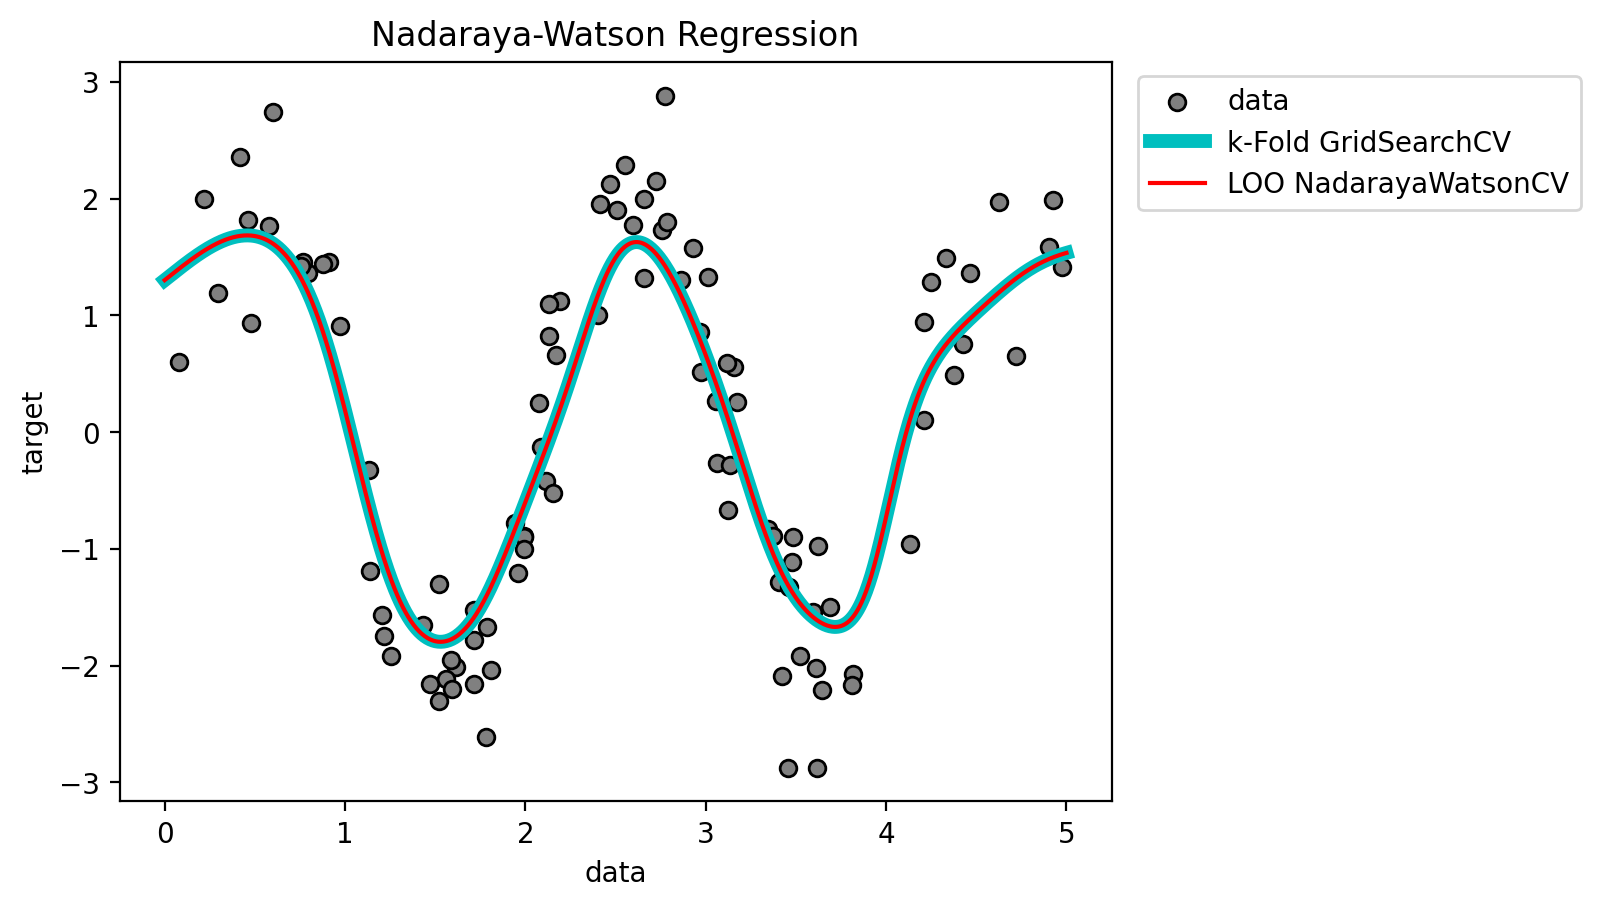

In [ ]:
# Fit regression model
train_size = 100
param_grid=[dict(kernel=['polynomial'], degree=np.arange(1, 3)),dict(kernel=['rbf'], gamma=np.logspace(-4, 1, 100))]

# use the sklearn gridsearch
nw_gs = GridSearchCV(NadarayaWatson(), cv=10, param_grid=param_grid)

# use the internal LOO (leave-one-out cross-validation)
nw_cv = NadarayaWatsonCV(param_grid)

# fit k-fold using GridSearch
nw_gs.fit(X[:train_size], y[:train_size])


print("\toptimal bandwidth found: %.2f" % nw_gs.best_estimator_.gamma)

# fit leave-one-out using NadarayaWatsonCV

nw_cv.fit(X[:train_size], y[:train_size])

print("\toptimal bandwidth found: %.3f" % nw_cv.gamma)

# predict
y_gs = nw_gs.predict(X_plot)
y_cv = nw_cv.predict(X_plot)

plt.scatter(X[:100], y[:100], c='grey', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_gs, 'c', lw=5, label='k-Fold GridSearchCV')
plt.plot(X_plot, y_cv, 'r', lw=1.5, label='LOO NadarayaWatsonCV')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Nadaraya-Watson Regression')
plt.legend(loc = 9, bbox_to_anchor=(1.25,1))
#plt.savefig('fig3.png',bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
# here you have to guess the "right" number of splines: since we have about 100 data points we should test 6 or 7 splines
gam = LinearGAM(n_splines=ceil(np.log2(len(X[:train_size])))).gridsearch(X[:train_size], y[:train_size],objective='GCV')

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


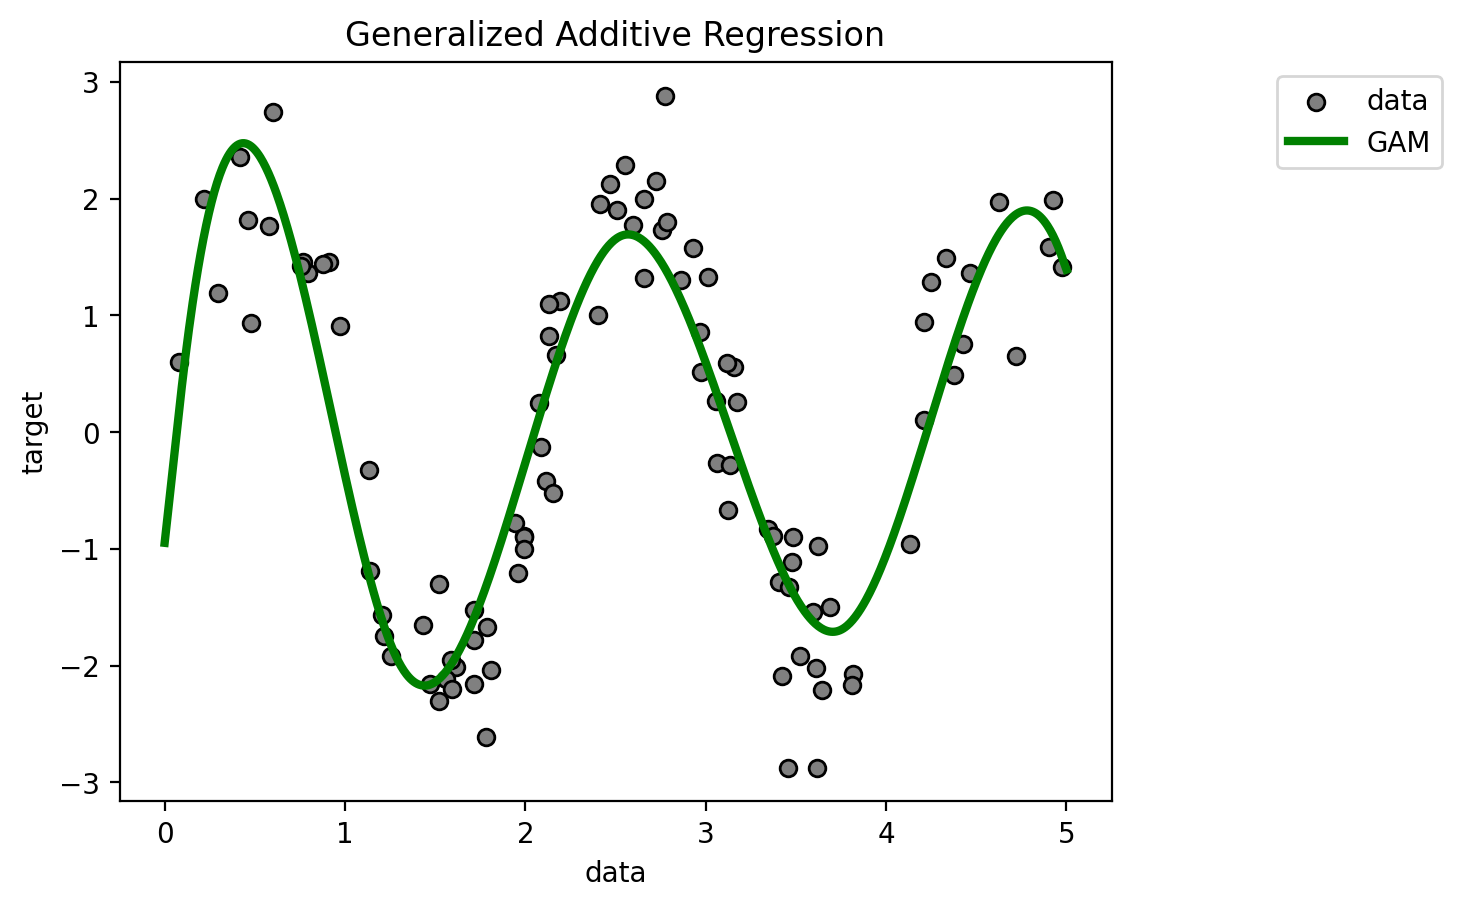

In [ ]:
y_gams = gam.predict(X_plot)
plt.scatter(X[:100], y[:100], c='grey', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_gams, 'g', lw=3, label='GAM')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Generalized Additive Regression')
plt.legend(loc = 9, bbox_to_anchor=(1.25,1))
plt.show()

### Applications with Real Data

In [ ]:
data_concrete = pd.read_csv('concrete.csv')

In [ ]:
x = data_concrete[data_concrete.columns[:-1]]
y = data_concrete[data_concrete.columns[-1]]

In [ ]:
ceil(np.log2(len(x)))

11

In [ ]:
# compute the number of knots
n_knots = ceil(np.log2(len(x)))

In [ ]:
gam = LinearGAM(n_splines=n_knots).gridsearch(x.values, y.values,objective='GCV')

100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


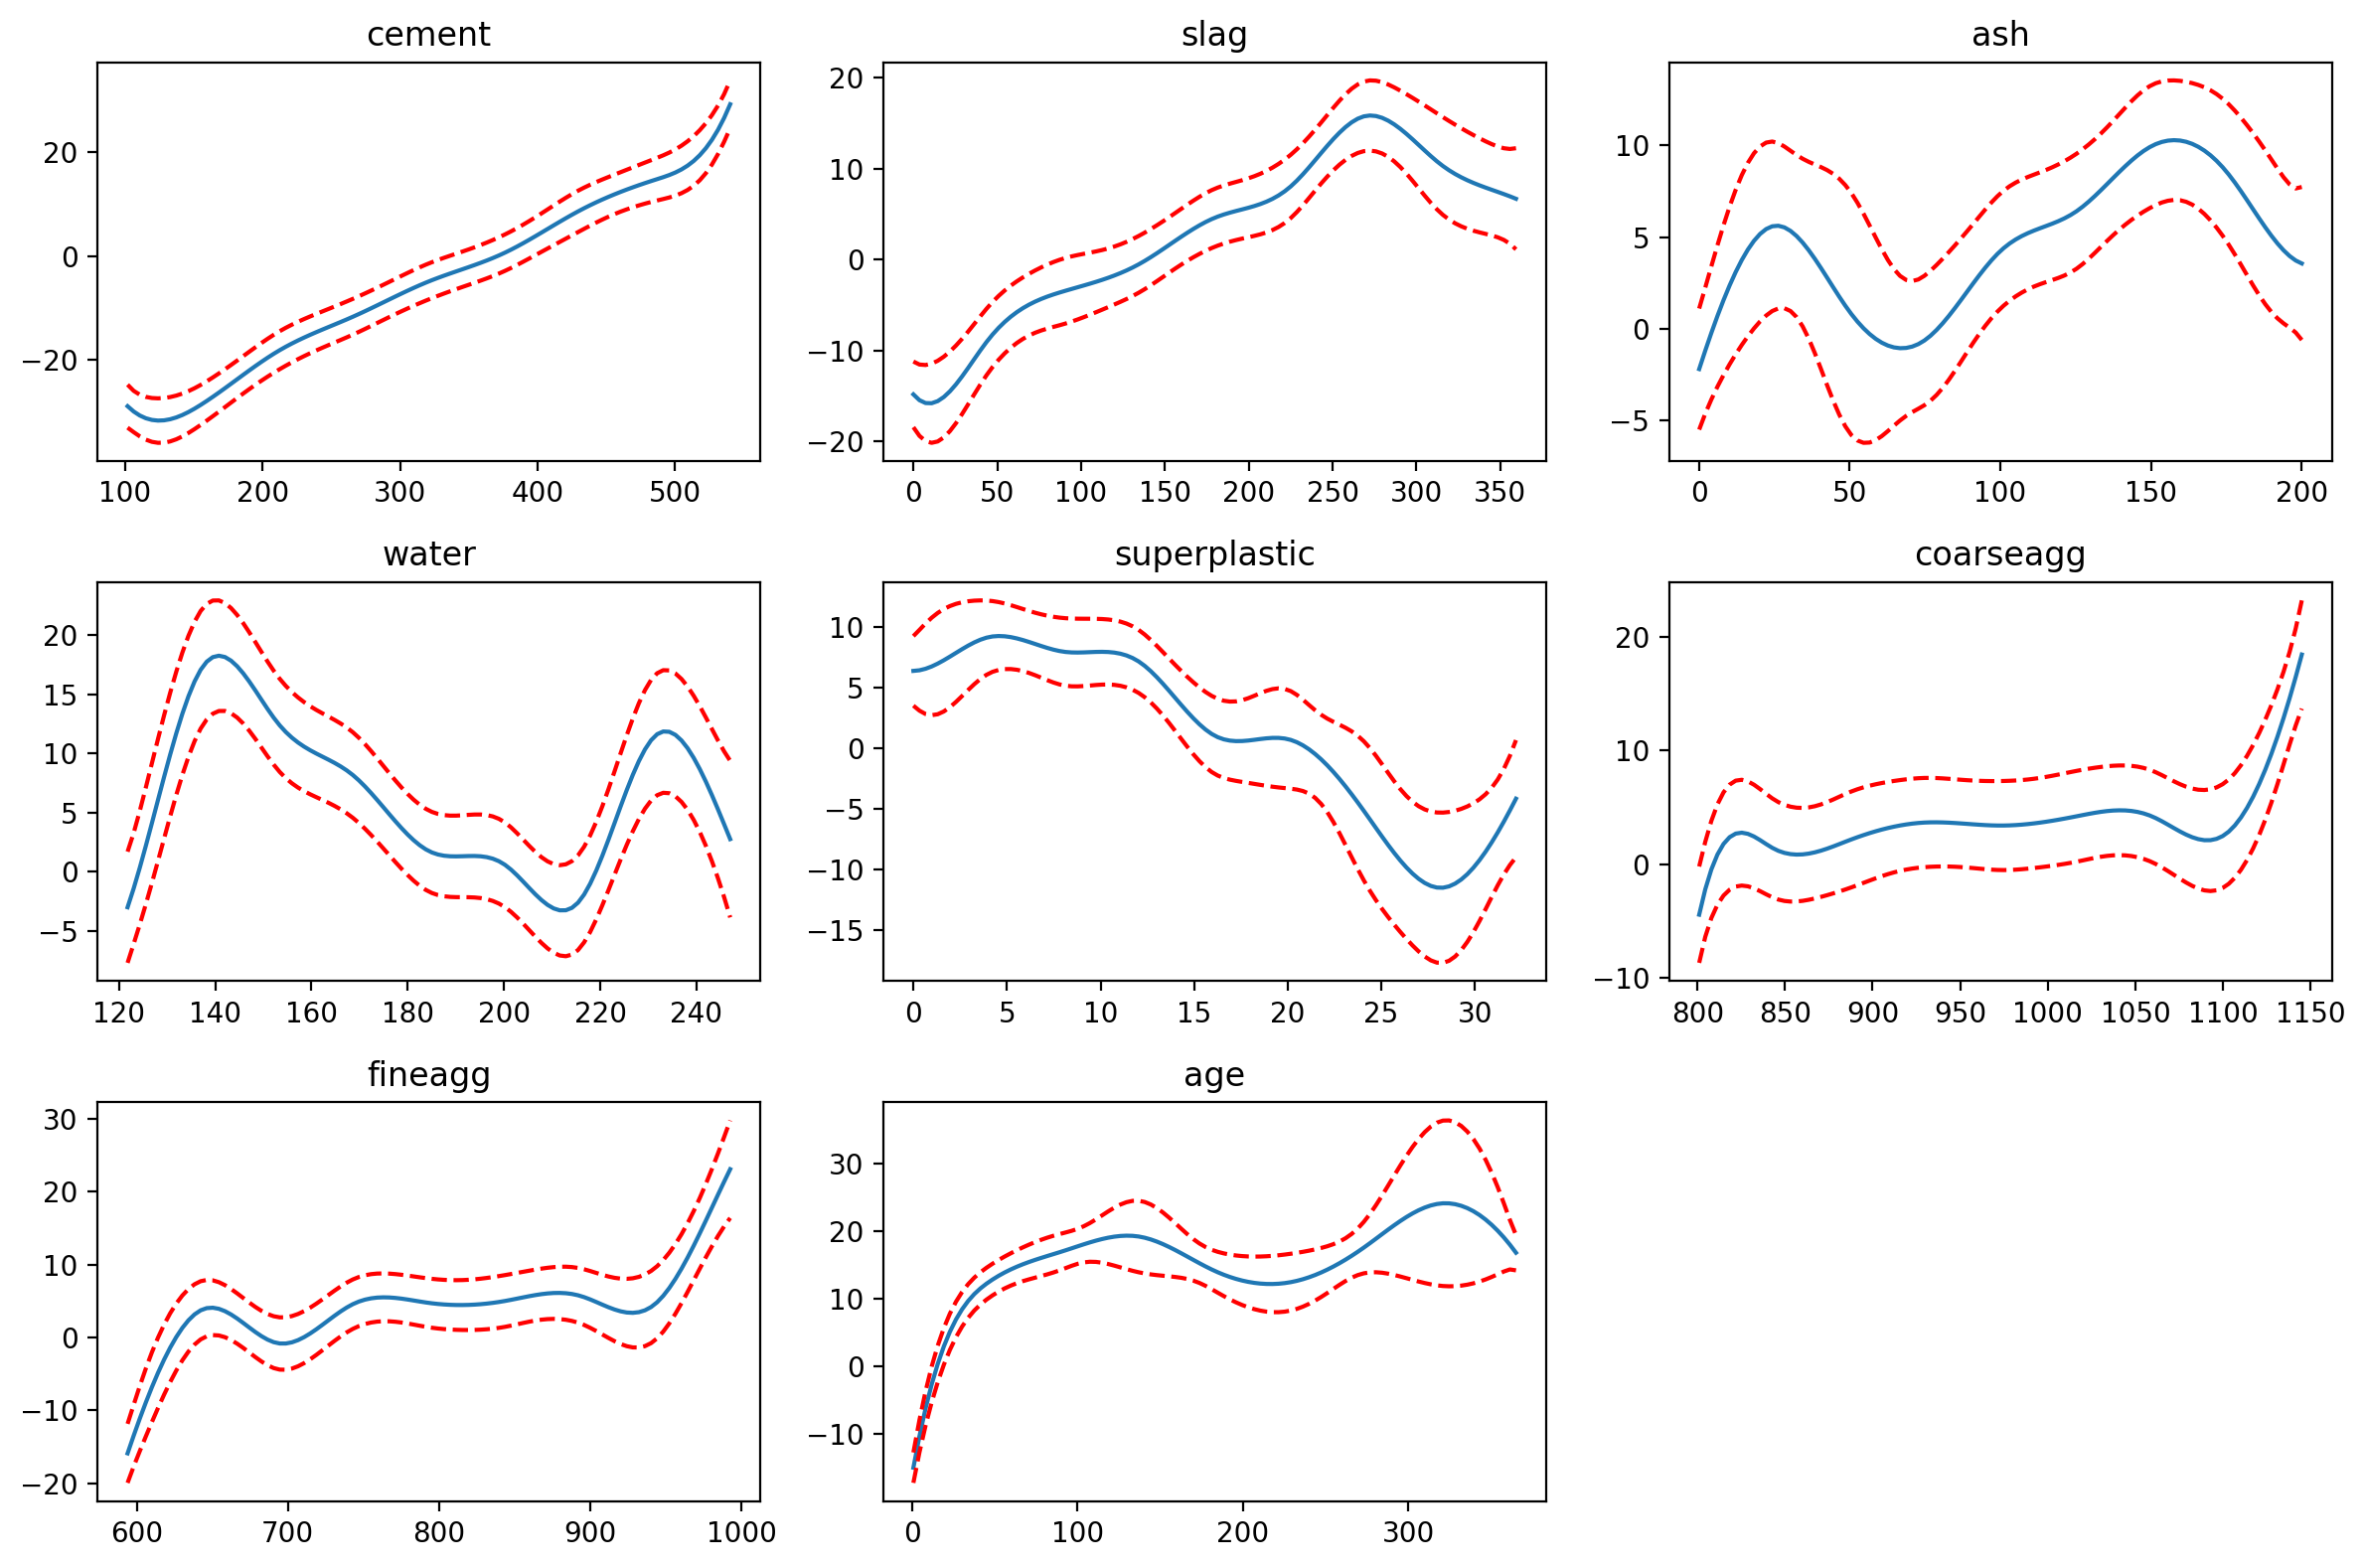

In [ ]:

fig = plt.figure(figsize=(8,12))
titles = x.columns

fig.set_figheight(8)
fig.set_figwidth(12)

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(XX[:, term.feature], pdep)
    ax.plot(XX[:, term.feature], confi, c='r', ls='--')
    ax.set_title(titles[i])
    fig.tight_layout()
plt.show()

In [ ]:
gam.terms

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept